In [1]:
import json
import hashlib
import time
from matplotlib import pyplot as plt


In [2]:
class Block():
    def __init__(self, index, transactions, timestamp, previous_hash, current_hash = "", nonce: int = 0):
        self.index = index
        self.transactions = transactions
        self.timestamp = timestamp
        self.previous_hash = previous_hash
        self.current_hash = current_hash
        self.nonce = nonce
        
    def compute_hash(self):
        block_string = json.dumps(self.__dict__, sort_keys = True)
        
        block_hash = hashlib.sha256(block_string.encode('utf-8')).hexdigest()

        return block_hash
    
    

        
        

In [3]:
bloque = Block(1,2,3,4)
bloque.compute_hash()

'e4a42b27c826f45421870630fbc2ec460d069d54a89a5e89d8f437547fcff8d0'

## 1.2: Definición de objeto Cadena 

In [4]:
class Blockchain():
    def __init__(self, difficulty = 2):
        self.chain = []
        self.create_genesis_block()
        
        self.difficulty = difficulty
        
    def create_genesis_block(self):
        block = Block(0,[],time.time(),"0")
        hash_block = block.compute_hash()
        block.current_hash = hash_block
        self.chain.append(block)
     
    @property
    def last_block(self):
        return self.chain[-1]
    
    def proof_of_work(self, block: Block):
        zeros = ""
        for i in range(self.difficulty):
            zeros = zeros + "0"
        print("Zeros: " + zeros)
        if zeros != "":
            while block.current_hash.startswith(zeros) == False:
                block.nonce = block.nonce + 1
                block.previous_hash = block.current_hash
                block.current_hash = block.compute_hash()
        else:
            block.current_hash = block.compute_hash()

        return block.current_hash
        

In [5]:
blockchain = Blockchain(difficulty=3)
blockchain.last_block.__dict__

{'index': 0,
 'transactions': [],
 'timestamp': 1682060745.508776,
 'previous_hash': '0',
 'current_hash': '5b62d46985ce63e9aa57ef946bd1aff06ae0e105f4a1a0cf82d869f0ebd0d517',
 'nonce': 0}

In [6]:
new_index = blockchain.last_block.index + 1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block.current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)
newblock.__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1682060747.439,
 'previous_hash': '5b62d46985ce63e9aa57ef946bd1aff06ae0e105f4a1a0cf82d869f0ebd0d517',
 'current_hash': '',
 'nonce': 0}

In [7]:
blockchain.proof_of_work(newblock)

Zeros: 000


'000010fca1e30f3664772b86e3e016b3ae50c65468de8d04ce6ac759798bd9f7'

In [8]:
newblock.nonce

9291

In [9]:
difficulty = 0
times = []
for i in range(7):
    print("Difficulty: "+str(difficulty))
    blockchain = Blockchain(difficulty=difficulty)
    new_index = blockchain.last_block.index + 1
    new_transaction = ["Transaccion 1"]
    new_timestamp = time.time()
    new_previous_hash = blockchain.last_block.current_hash
    newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)
    newblock.__dict__
    start = time.time()
    blockchain.proof_of_work(newblock)
    end = time.time()
    print(newblock.nonce)
    times.append(end-start)
    
    difficulty = difficulty + 1


Difficulty: 0
Zeros: 
0
Difficulty: 1
Zeros: 0
4
Difficulty: 2
Zeros: 00
137
Difficulty: 3
Zeros: 000
2190
Difficulty: 4
Zeros: 0000
84655
Difficulty: 5
Zeros: 00000
417210
Difficulty: 6
Zeros: 000000
11352841


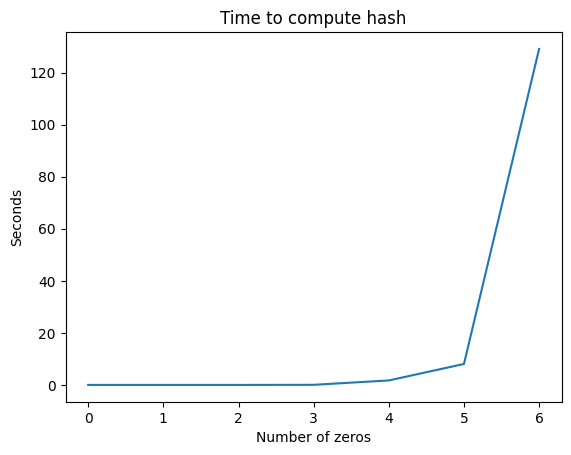

In [10]:
plt.plot([0,1,2,3,4,5,6],times)
plt.title("Time to compute hash")
plt.xlabel("Number of zeros")
plt.ylabel("Seconds")
plt.show()


## 1.4: Minado de bloques

In [3]:
class Blockchain():
    def __init__(self, difficulty = 2):
        self.chain = []
        self.create_genesis_block()
        self.difficulty = difficulty
        self.unconfirmed_transactions = []
        
    def create_genesis_block(self):
        block = Block(0,[],time.time(),"0")
        hash_block = block.compute_hash()
        block.current_hash = hash_block
        self.chain.append(block)
     
    @property
    def last_block(self):
        return self.chain[-1]
    
    def proof_of_work(self, block: Block):
        calculated_hash = ""
        zeros = ""
        for i in range(self.difficulty):
            zeros = zeros + "0"
        print("Zeros: " + zeros)
        if zeros != "":
            while calculated_hash.startswith(zeros) == False:
                block.nonce = block.nonce + 1
                calculated_hash = block.compute_hash()
        else:
            calculated_hash = block.compute_hash()

        return calculated_hash
    
    def is_valid_proof(self, block: Block, hash_block: str):
        print("Received block: ", block.__dict__)
        zeros = ""
        for i in range(self.difficulty):
            zeros = zeros + "0"
        if hash_block.startswith(zeros) == False:
            print("Does not start with zeros")
            return False
        
        verification_hash = block.compute_hash()
        if verification_hash != hash_block:
            print("Hash is incorrect")
            print("Received hash: "+hash_block)
            print("Block nonce: "+str(block.nonce))
            print("Verification hash: "+verification_hash)
            print("\n Block received: ", block.__dict__)
            return False
        
        block.current_hash = hash_block
        return True
    
    def append_block(self, block: Block, hash_block: str):
        if block.previous_hash != self.last_block.current_hash:
            print("Previous hash is not equal to last block hash from chain")
            print("Previous hash: " + block.previous_hash)
            print("Last block hash: " + self.last_block.current_hash)
            return False
        if self.is_valid_proof(block, hash_block) != True:
            print("Is not valid proof")
            return False
        
        block.current_hash = hash_block
        self.chain.append(block)
        return True
    
    def add_new_transaction(self, transaction: str):
        self.unconfirmed_transactions.append(transaction)
        
    def mine(self):
        if len(self.unconfirmed_transactions) == 0:
            return False
        
        new_block = Block(index = self.last_block.index + 1,
                         transactions = self.unconfirmed_transactions,
                         timestamp = time.time(),
                         previous_hash = self.last_block.current_hash)
        
        proof = self.proof_of_work(new_block)
        verification = self.append_block(new_block, proof)
        if verification == True:
            self.unconfirmed_transactions = []
            return new_block.index
        else:
            return False
        
    def check_chain(self, chain):
        for index, block in enumerate(chain):
            if block.index>0:
                current_hash = block.current_hash
    #             delattr(block, "current_hash")
                block.current_hash = ""
                if self.is_valid_proof(block, current_hash) != True:
                    return False
                
                previous_block = chain[block.index - 1]
                if previous_block.current_hash != block.previous_hash:
                    return False

                block.current_hash = current_hash
        return True
    
            

In [87]:
blockchain = Blockchain()
blockchain.last_block.__dict__

{'index': 0,
 'transactions': [],
 'timestamp': 1682067825.1821306,
 'previous_hash': '0',
 'current_hash': '210088d73794fa165768e8cf350fed176e50eb8dd56cbb69731214afad6ed8aa',
 'nonce': 0}

In [88]:
print("Length of the BCh: ", len(blockchain.chain))

Length of the BCh:  1


In [89]:
new_index = blockchain.last_block.index + 1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block.current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)
newblock.__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1682067826.7012317,
 'previous_hash': '210088d73794fa165768e8cf350fed176e50eb8dd56cbb69731214afad6ed8aa',
 'current_hash': '',
 'nonce': 0}

In [90]:
new_hash = blockchain.proof_of_work(newblock)
print("Hash of newblock: ", new_hash)

Zeros: 00
Hash of newblock:  00fcd3f8a2cbd078d2be59c566794090f148e323b57275b39020dc10882e99c8


In [91]:
print(newblock.__dict__)
out = blockchain.append_block(newblock, new_hash)
print("Appended: ",out)
blockchain.last_block.__dict__

{'index': 1, 'transactions': [], 'timestamp': 1682067826.7012317, 'previous_hash': '210088d73794fa165768e8cf350fed176e50eb8dd56cbb69731214afad6ed8aa', 'current_hash': '', 'nonce': 603}
Received block:  {'index': 1, 'transactions': [], 'timestamp': 1682067826.7012317, 'previous_hash': '210088d73794fa165768e8cf350fed176e50eb8dd56cbb69731214afad6ed8aa', 'current_hash': '', 'nonce': 603}
Appended:  True


{'index': 1,
 'transactions': [],
 'timestamp': 1682067826.7012317,
 'previous_hash': '210088d73794fa165768e8cf350fed176e50eb8dd56cbb69731214afad6ed8aa',
 'current_hash': '00fcd3f8a2cbd078d2be59c566794090f148e323b57275b39020dc10882e99c8',
 'nonce': 603}

In [92]:
blockchain.add_new_transaction("data1")
blockchain.add_new_transaction("data2")
blockchain.add_new_transaction("data3")

In [93]:
blockchain.unconfirmed_transactions

['data1', 'data2', 'data3']

In [94]:
new_index = blockchain.mine()
print(new_index)

Zeros: 00
Received block:  {'index': 2, 'transactions': ['data1', 'data2', 'data3'], 'timestamp': 1682067830.938192, 'previous_hash': '00fcd3f8a2cbd078d2be59c566794090f148e323b57275b39020dc10882e99c8', 'current_hash': '', 'nonce': 473}
2


In [95]:
print("Length of the BCh: ",len(blockchain.chain))

Length of the BCh:  3


In [96]:
blockchain.last_block.__dict__

{'index': 2,
 'transactions': ['data1', 'data2', 'data3'],
 'timestamp': 1682067830.938192,
 'previous_hash': '00fcd3f8a2cbd078d2be59c566794090f148e323b57275b39020dc10882e99c8',
 'current_hash': '00cbf8ef40526afbf6ad9ef50a48647dbb246efecb25fdde5ca9f4323dea264c',
 'nonce': 473}

## 1.5 Chequeo de la cadena 

In [97]:
chain_to_check = blockchain.chain
blockchain.check_chain(chain_to_check)

Received block:  {'index': 1, 'transactions': [], 'timestamp': 1682067826.7012317, 'previous_hash': '210088d73794fa165768e8cf350fed176e50eb8dd56cbb69731214afad6ed8aa', 'current_hash': '', 'nonce': 603}
Received block:  {'index': 2, 'transactions': ['data1', 'data2', 'data3'], 'timestamp': 1682067830.938192, 'previous_hash': '00fcd3f8a2cbd078d2be59c566794090f148e323b57275b39020dc10882e99c8', 'current_hash': '', 'nonce': 473}


True

## 1.6 - 1.7 API REST

In [13]:
from flask import Flask, request
import json
import requests
import time

app = Flask(__name__)

blockchain = Blockchain()
peers = set()

@app.route('/new_transaction', methods = ['POST'])
def new_transaction():
    tx_data = request.get_json()
    required_fields = ["author", "content"]
    
    for field in required_fields:
        if (field not in tx_data) or (tx_data[field]==""):
            return "Invalid transaction data", 404
        
    tx_data["timestamp"] = time.time()
    
    blockchain.add_new_transaction(tx_data)
    
    return "Success", 201
    
    
@app.route('/chain', methods = ['GET'])
def get_chain_data():
    chain_data = {}
    chain_data["length"] = len(blockchain.chain)
    
    chain_data["chain"] = []
    for block in blockchain.chain:
        chain_data["chain"].append(block.__dict__)
        
    chain_data["peers"] = list(peers)
    
    chain_data_json = json.dumps(chain_data)
    
    return chain_data_json


@app.route('/mine', methods = ['GET'])
def mine():
    if len(blockchain.unconfirmed_transactions) == 0:
        return "There are no transactions to mine", 200
    
    new_block_index = blockchain.mine()
        
    if new_block_index == False:
        return "Mining error", 500
        
    return "Block #" + str(new_block_index)+" was mined", 200


@app.route('/pending_transactions', methods = ['GET'])
def get_pending_transactions():
    return blockchain.unconfirmed_transactions, 200


@app.route('/register_new_node', methods = ['POST'])
def register_new_node():
    new_node_address = request.get_json()["new_node_address"]
    
    if not new_node_address:
        return "Invalid data", 400
    
    else:
        peers.add(new_node_address)
        
        return get_chain_data()
    
    
@app.route('/register_with_existing_node', methods = ['POST'])
def register_with_existing_node():
    node_address = request.get_json()["node_address"]
    if not new_node_address:
        return "Invalid data", 400
    
    data = {"new_node_address": request.host_url}
    headers = {"Content-Type": "application/json"}
    
    node_address_json = json.dumps({"new_node_address":node_address})
    
    response = requests.post("http://localhost:5000/register_new_node", json = node_address_json)
    
    if response.status_code == 200:
        chain_dump = response.json()['chain']
        peer_dump = response.json()['peer']
        
        new_blockchain = Blockchain()
        
        for block in chain_dump:
            block_hash = block.current_hash
            block.current_hash = ""
            validation = new_blockchain.append_block(block, current_hash)
            if validation == False:
                return "Validation Error in block #"+str(block.index), 500
            

    
    
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Apr/2023 11:57:40] "POST /register_new_node HTTP/1.1" 200 -
